# Observations and Insights

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mice_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice_count = combined_mice_data["Mouse ID"].count()
mice_count

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = combined_mice_data.loc[combined_mice_data.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_id = combined_mice_data.loc[combined_mice_data["Mouse ID"] == "g989"]
duplicate_mice_id                              

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mice_duplicates_removed = combined_mice_data[combined_mice_data["Mouse ID"].isin(duplicate_mice)==False]
mice_duplicates_removed

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
final_mice = mice_duplicates_removed["Mouse ID"].count()
final_mice

1880

## Summary Statistics

In [7]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:       
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean = mice_duplicates_removed.groupby("Drug Regimen").mean()['Tumor Volume (mm3)']
print(f"The mean tumor volume for each regimen is {mean}")

median = mice_duplicates_removed.groupby("Drug Regimen").median()['Tumor Volume (mm3)']
print(f"The median tumor volume for each regimen is {median}")

variance = mice_duplicates_removed.groupby("Drug Regimen").var()['Tumor Volume (mm3)']
print(f"The tumor volume variance for each regimen is {variance}")

std = mice_duplicates_removed.groupby("Drug Regimen").std()['Tumor Volume (mm3)']
print(f"The standard deviation of tumor volume for each regimen is {std}")

sem = mice_duplicates_removed.groupby("Drug Regimen").sem()['Tumor Volume (mm3)']
#final_mice.sem = (0, True, None, 1, None)
print(f"The SEM value for tumor volume for each regimen is {sem}")

# Assemble the resulting series into a single summary dataframe.
stat_summary = pd.DataFrame({"Mean": mean,
                            "Median": median,
                            "Variance": variance,
                            "Standard Deviation": std,
                            "SEM": sem})

The mean tumor volume for each regimen is Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64
The median tumor volume for each regimen is Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64
The tumor volume variance for each regimen is Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64
The standard dev

In [8]:
stat_summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# Set a title for the chart
list1 = mice_duplicates_removed.groupby(["Drug Regimen"]).count()["Timepoint"]
list1

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

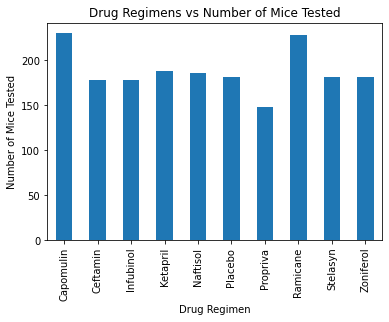

In [25]:
# bar_charts_one= list1['Drug Regimen'].value_counts()
x_axis=np.arange(len(list1))
ticks = [value for value in x_axis]

bar_charts_one=list1.plot(kind="bar", title="Drug Regimens vs Number of Mice Tested")
bar_charts_one.set_xlabel("Drug Regimen")
bar_charts_one.set_ylabel("Number of Mice Tested")
plt.show()

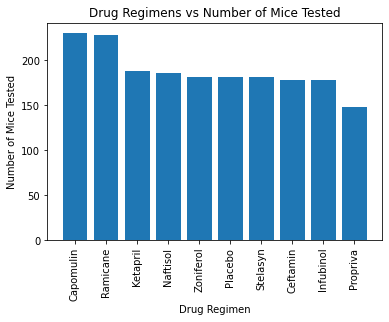

In [26]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
counts = mice_duplicates_removed["Drug Regimen"].value_counts()
plt.bar(counts.index.values,counts.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Mice Tested")
plt.title("Drug Regimens vs Number of Mice Tested")
plt.show()

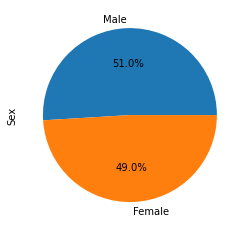

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
counts = mice_duplicates_removed.Sex.value_counts()
counts.plot(kind="pie",autopct='%1.1f%%')
plt.show()

In [27]:
list2 = mice_duplicates_removed.groupby(["Sex"]).count()["Mouse ID"]
list2

Sex
Female    922
Male      958
Name: Mouse ID, dtype: int64

ValueError: could not convert string to float: 'k403'

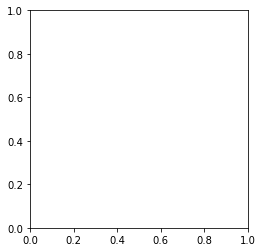

In [81]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sizes = ["922", "958"]
labels = ["Female", "Male"]
colors = ["red", "blue"]

ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')

plt.show()

## Quartiles, Outliers and Boxplots

In [49]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_tumor_volume = mice_duplicates_removed["Tumor Volume (mm3)"].sum()
print(f"final_tumor_volume is: " + str(final_tumor_volume))

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


final_tumor_volume is: 94818.35127664


In [69]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimens = ["Capomulin" , "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drugs in drug_regimens:
    
     # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_count = new_df.loc[new_df["Drug Regimen"] == drugs, "Tumor Volume (mm3)"]
    # add subset 
    tumor_vol_data.append(tumor_count)

    quartiles = drugs.quantile([.25,.5,.75])
    lowerq=quartiles[0.25]
    upperq=quartiles[0.75]
    iqr=upperq-lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq -(1.5*iqr)
    upper_bound = upperq +(1.5*iqr)
    outliers = tumor_count.loc[tumor_count < lower_bound | (tumor_count > upper_bound)]
    
    print(f"{drugs}'s potential outliers: {outliers}\n")

AttributeError: 'str' object has no attribute 'quantile'

NameError: name 'tumor_count' is not defined

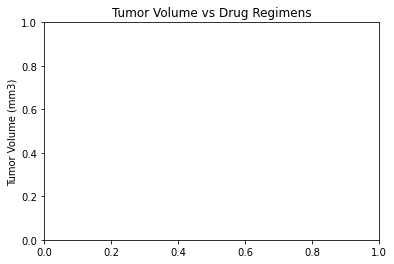

In [71]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title("Tumor Volume vs Drug Regimens")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.boxplot(tumor_count)
plt.show()

## Line and Scatter Plots

In [57]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_data = mice_duplicates_removed.loc[mice_duplicates_removed["Drug Regimen"] == "Capomulin",:]
Capomulin_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [61]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
x_axis = Campomulin_data["Weight (g)"]
avg_tumor_vol = Campomulin_data.groupby(["Mouse ID"].mean()

fig, ax1 = plt.subplots(figsize =(15,10))
plt.title("Camopulin Regimen Tumor Volume vs. Weight", fontsize = 14)
plt.scatter(x_axis, avg_tumor_vol)
plt.xlabel("Weight (g)", fontsize = 12)
plt.ylabel ("Tumor Volume (mm3)", fontsize = 12)

plt.show()

SyntaxError: invalid syntax (3249028065.py, line 5)

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
fig1, ax1 = plt.subplots(figsize=(15,10))